# Simple Appliances with multiple functioning windows

In this example we are going to build a load simulation of a households category with only access to some indoor light bulbs.

In [1]:
# importing functions
from ramp import User, UseCase
import pandas as pd

### Creating a user category 

To represent a user category, which is a collection of users with similar consumption characteristics such as appliance ownership and consumption behavior, the class **User** should be used. Each User instance is initially characterized by the number of users assigned to the user category. For example, let's consider a household category comprising 10 households:

In [4]:
household = User(
    user_name="Household",
    num_users=10,
)

### Creating a simple appliance with two functioning time
In the most basic use cases of RAMP, you can model appliances with random usage variability across different time windows throughout the day, as will be created in this example.

To model appliances within a household category, parameters such as the number of appliances owned, power usage, number of usage windows, and total usage time need to be specified. Additionally, parameters like the minimum usage time after a switch-on event can enhance the realism of simulations. The randomness of appliance usage can be adjusted through parameters such as variability in the usage window or total usage time.

For example, let's consider a household category where each household owns 6 "Indoor Light Bulbs," each consuming 7 Watts. These light bulbs are used for 120 minutes in two time windows: from 00:00 to 00:30 and from 19:30 to 24:00. In RAMP simulations, time resolution is measured in minutes, with each simulation representing a single day from 00:00 (corresponding to minute 0) to 24:00 (corresponding to minute 1440).

Assuming a minimum usage time of 10 minutes each time a light bulb is switched on, we can simulate this appliance by creating a new appliance using the **add_appliance** method of the User object:

In [8]:
# add_appliance is meth
indoor_bulb = household.add_appliance(
    name="Indoor Light Bulb",  # the name of the appliance
    number=6,  # how many of this appliance each user has in this user category
    power=7,  # the power (in Watt) of each single appliance. RAMP does not deal with units of measures, you should check the consistency of the unit of measures throughout your model
    num_windows=2,  # how many usage time windows throughout the day?
    func_time=120,  # the total usage time of appliances
    func_cycle=10,  # the minimum usage time after a switch on event
    window_1=[0, 30],  # from 24 to 00:30
    window_2=[1170, 1440],  # from 19:30 to 24:00
    random_var_w=0.35,  # Variability of the windows in percentage
    time_fraction_random_variability=0.2,  # randomizes the total time the appliance is on (between 0 and 1)
)

In [10]:
print(household)

   user_name  num_users               name  number  power
0  Household         10  Indoor Light Bulb       6    7.0


You can check the  **maximum theoretical profile** of the appliance and user category by calling the **maximum_profile** property of each user or appliance object:

<Axes: >

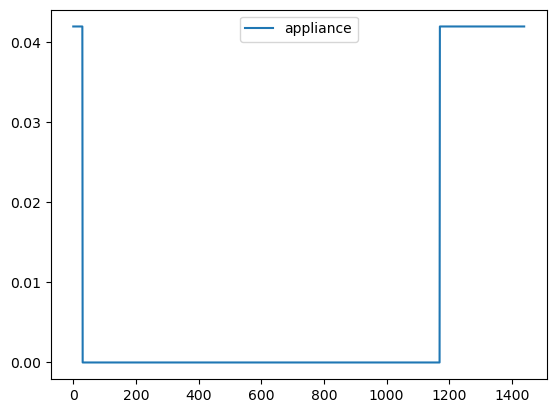

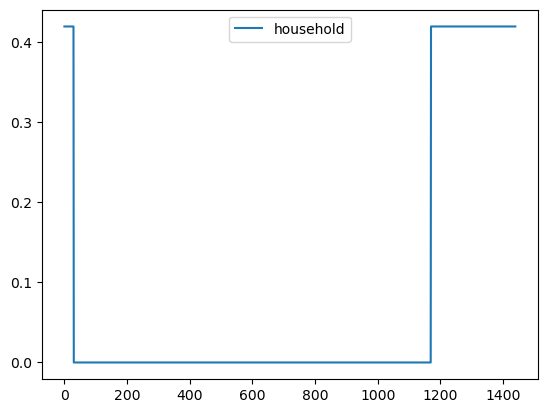

In [13]:
# Checking the maximum profile of the appliance and user

max_profile_bulb = pd.DataFrame(indoor_bulb.maximum_profile, columns=["appliance"])
max_profile_user = pd.DataFrame(household.maximum_profile, columns=["household"])

max_profile_bulb.plot()
max_profile_user.plot()

### Whole year profile functionality

To generate profiles spanning more than a single day, the UseCase class in RAMP allows for specifying calendar days as the start and end dates of the simulation. The UseCase class serves as a collector of different user categories and provides user-friendly methods for generating profiles with various settings.

For example, suppose you want to simulate the behavior of 10 households for the entire year 2020. Using the UseCase class, you can specify the calendar days for the start and end dates of the simulation, creating a comprehensive profile spanning the entire year:

In [15]:
use_case = UseCase(
    users=[
        household
    ],  # A list of all the user categories to be included in the simulation. In this case, we only have household user category
    date_start="2020-01-01",  # starting date of the simulation
    date_end="2020-12-31",  # end date of the simulation
)

You will simulate 366 day(s) from 2020-01-01 00:00:00 until 2021-01-01 00:00:00


C:\Users\liche\AppData\Roaming\Python\Python312\site-packages\ramp\core\core.py:299: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  end=self.days[-1] + pd.Timedelta(1, "d") - pd.Timedelta(1, "T"),
C:\Users\liche\AppData\Roaming\Python\Python312\site-packages\ramp\core\core.py:297: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.__datetimeindex = pd.date_range(


To generate the profiles, you can use, **generate_daily_load_profiles** methods.

In [18]:
whole_year_profile = use_case.generate_daily_load_profiles()

<Axes: >

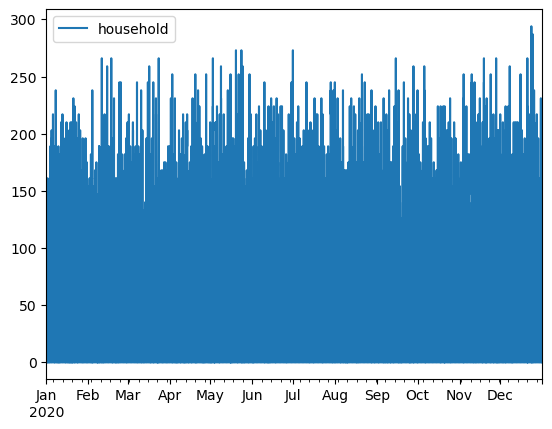

In [20]:
whole_year_profile = pd.DataFrame(
    whole_year_profile, columns=["household"], index=use_case.datetimeindex
)
whole_year_profile.plot()

### Generating a profile for a single day

To generate daily profiles for specific user categories, the User class in RAMP offers various methods. One such method is **generate_single_load_profile**, which constructs a load profile for a single user, accounting for all their appliances, based on a specific day of the year or a designated day_type. In RAMP, day_types represent weekdays and weekends, with day_type=0 indicating weekdays and day_type=1 signifying weekends. When defining appliances using the add_appliance method, users can specify whether the appliance is utilized throughout the designated wd_we_type argument.

For instance, let's consider the scenario where we aim to generate a single-day load profile for a weekday of the year for a single user within the household category:

In [22]:
single_profile = household.generate_single_load_profile(day_type=0)

<Axes: >

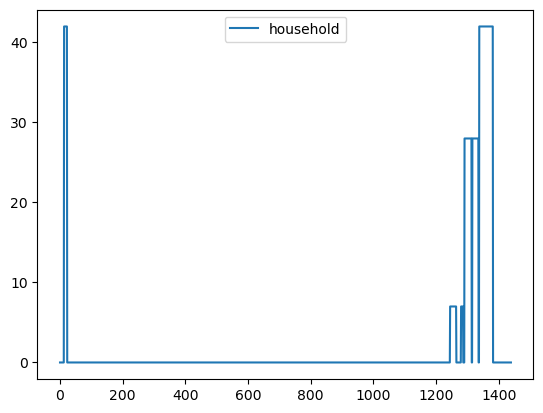

In [24]:
single_profile = pd.DataFrame(single_profile, columns=["household"])
single_profile.plot()

### Generating aggregated_load_profile for the user category

If instead of a single user from the categoy, you want to generate load profiles of the aggregated users of the category, for a single day, you can use the similar method of User class, named **generate_aggregated_load_profile**:

In [26]:
aggregated_profile = household.generate_aggregated_load_profile(day_type=0)

<Axes: >

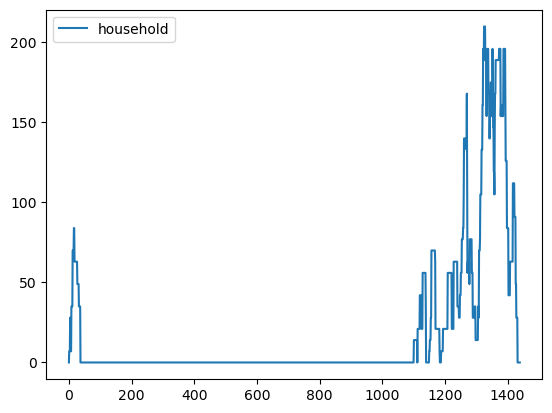

In [28]:
aggregated_profile = pd.DataFrame(aggregated_profile, columns=["household"])
aggregated_profile.plot()